## **Python Analysis: Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

# Data Exploration

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, r2_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [86]:
pip install ucimlrepo

In [87]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
obesity_data = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = obesity_data.data.features
y = obesity_data.data.targets

obesity_df = pd.concat([X, y], axis=1)
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [88]:
# Check for missing values in obesity_df
missing_values = obesity_df.isnull().sum()
missing_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [89]:
# Summary Statistics numerical cols
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [90]:
class_distribution = obesity_df['NObeyesdad'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


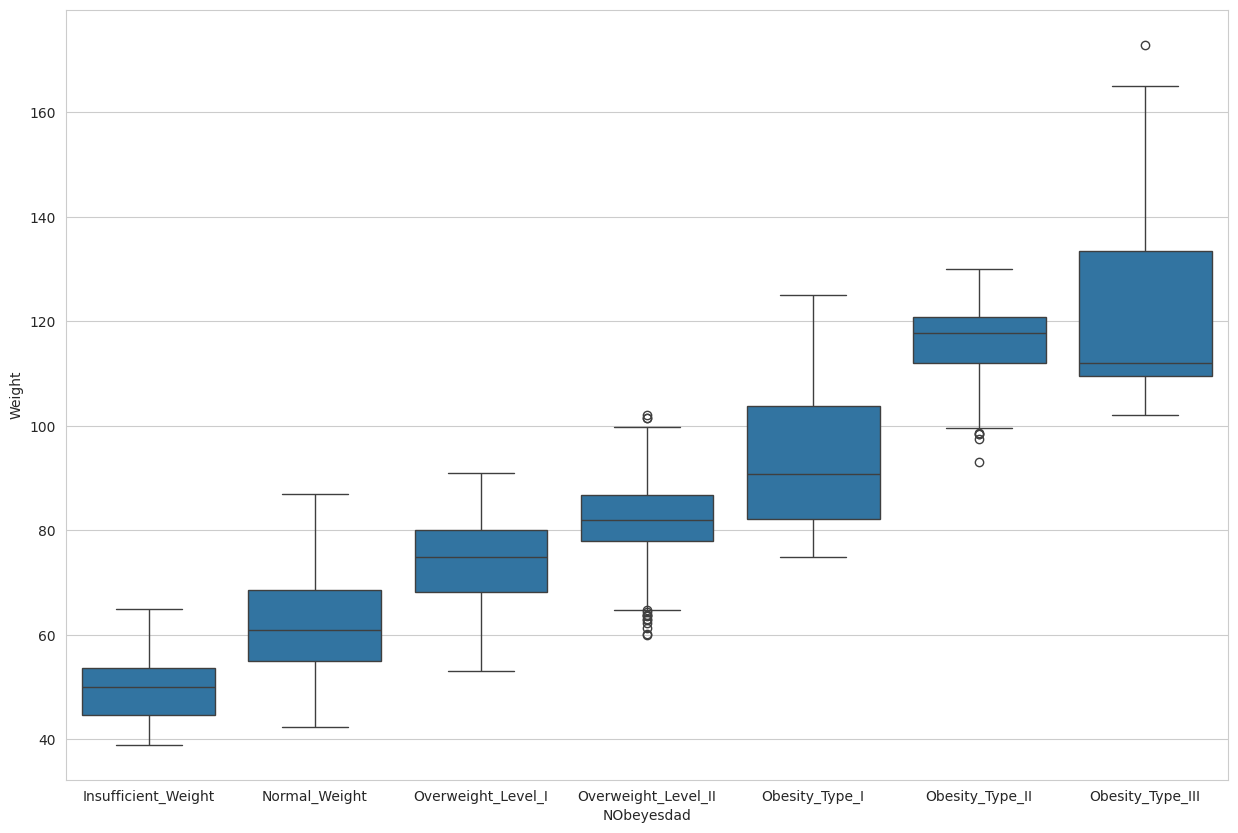

In [91]:
# Distribution by Obesity Level
category_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
# boxplot for NObeyesdad and Weight
plt.figure(figsize=(15, 10))
sns.boxplot(x='NObeyesdad', y='Weight', data=obesity_df, order=category_order)
plt.show()

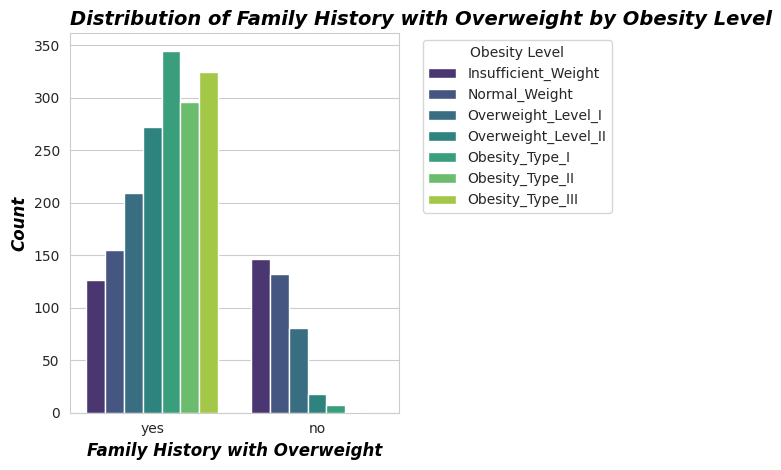

In [92]:
# Example color palette (You can customize these colors)
palette = sns.color_palette("viridis", n_colors=len(category_order))

sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=obesity_df,
              hue_order=category_order, # Set the order of categories in the hue
              palette = palette)     # Set the color palette

plt.title('Distribution of Family History with Overweight by Obesity Level',
          fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic'},
          loc='left',
          color='black')

plt.xlabel('Family History with Overweight',
           fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontstyle': 'italic'},
           color='black')

plt.ylabel('Count',
           fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontstyle': 'italic'},
           color='black')

plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout() # Adjust layout to make room for the legend
plt.show()

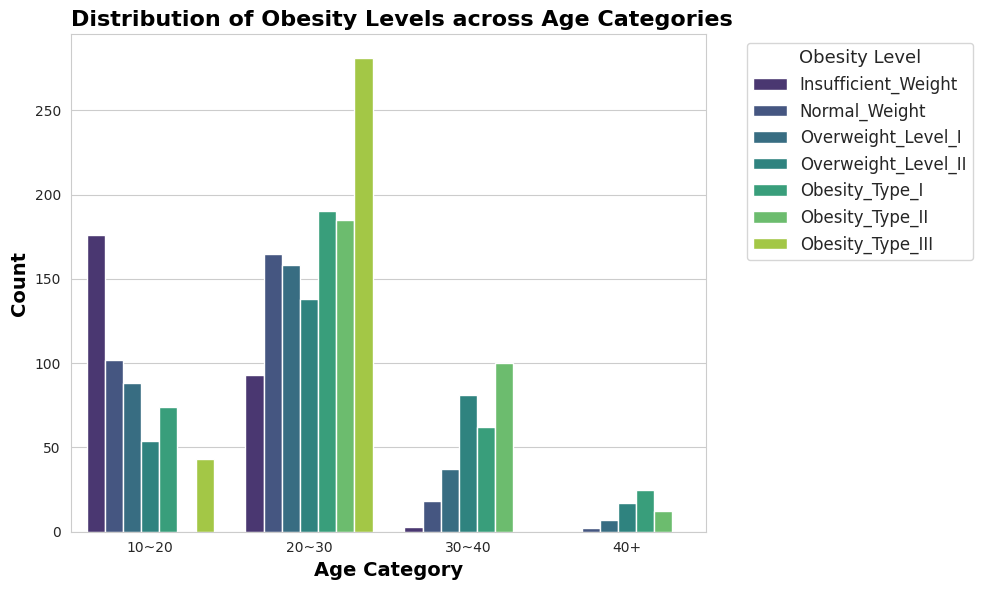

In [93]:
# Categorizing 'Age' into bins for better visualization and analysis
# Define bins for different age groups and corresponding labels
bins = [0, 20, 30, 40, float('inf')]  # Defines ranges for age groups
labels = ['10~20', '20~30', '30~40', '40+']  # Labels for the defined age groups
obesity_df_copy = obesity_df.copy()
# Categorizing 'Age' into 'Age_Category' using defined bins and labels
obesity_df_copy['Age_Category'] = pd.cut(obesity_df_copy['Age'], bins=bins, labels=labels, right=False)

# Define the specific order in which the obesity levels should be displayed in the plot
category_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Define a color palette for visual distinction of obesity levels
palette = sns.color_palette("viridis", n_colors=len(category_order))

# Creating the count plot
plt.figure(figsize=(10, 6))  # Makes the plot larger for better visibility

# Plotting 'Age_Category' vs the count of each 'NObeyesdad' category
sns.countplot(x='Age_Category', hue='NObeyesdad', data=obesity_df_copy,
              hue_order=category_order,  # Ensures the obesity levels are displayed in the specified order
              palette=palette)  # Applies the defined color palette

# Setting the title with styling options for better readability
plt.title('Distribution of Obesity Levels across Age Categories', fontdict={'fontsize': 16, 'fontweight': 'bold'}, loc='left', color='black')

# Setting x and y-axis labels with styling
plt.xlabel('Age Category', fontdict={'fontsize': 14, 'fontweight': 'bold'}, color='black')
plt.ylabel('Count', fontdict={'fontsize': 14, 'fontweight': 'bold'}, color='black')

# Adjusting the legend to avoid overlap with the plot by moving it outside the plot area
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='12', title_fontsize='13')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()  # Displays the plot

# Baseline Model 1_DecisionTreeClassifier

In [94]:
# Step 1: Prepare the data
# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)

# Step 4: Evaluate the classifier on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# change the y_test and y_pred to number
label_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

# Calculate MAE and MSE
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy: 0.9361702127659575

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        56
      Normal_Weight       0.88      0.85      0.87        62
     Obesity_Type_I       0.95      0.94      0.94        78
    Obesity_Type_II       0.93      0.95      0.94        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.91      0.90        56
Overweight_Level_II       0.98      0.94      0.96        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

Mean Absolute Error: 0.14184397163120568
Mean Squared Error: 0.45390070921985815


## Hyperparameters tuning for  the DecisionTreeClassifier

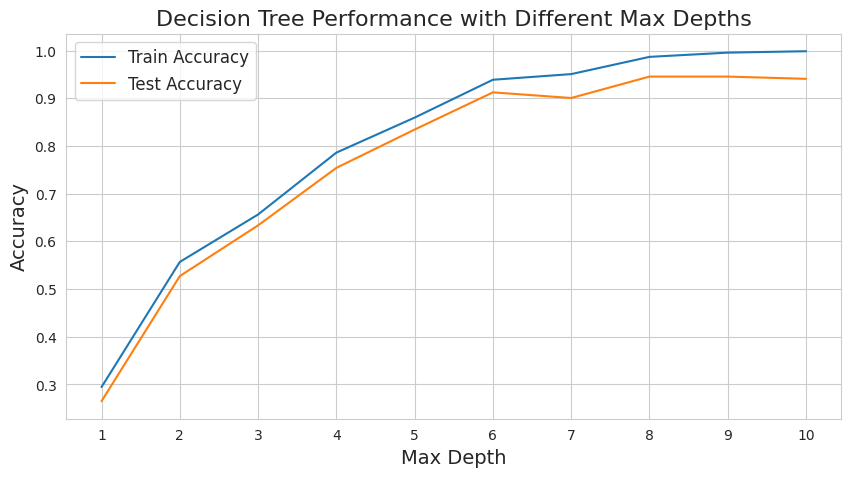

In [95]:
# Find optimal max_depth
accuracy_train_list = []
accuracy_test_list = []

for depth in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train)

    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(range(1, 11), accuracy_train_list, label="Train Accuracy")
plt.plot(range(1, 11), accuracy_test_list, label="Test Accuracy")
plt.legend(loc="upper left", prop={'size': 12})
plt.xticks(range(1, 11))
plt.xlabel("Max Depth", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Decision Tree Performance with Different Max Depths", size=16)
plt.show()


Optimal Max Depth = 8

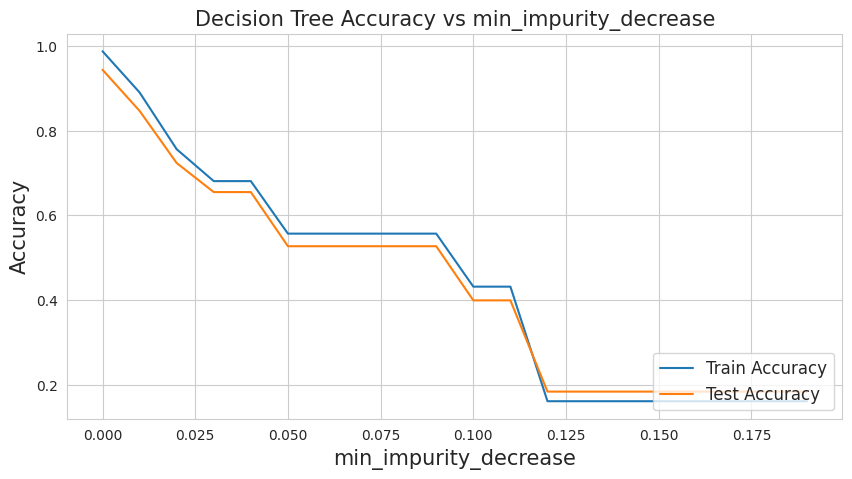

Test accuracies for each min_impurity_decrease value: [0.9432624113475178, 0.8463356973995272, 0.723404255319149, 0.6548463356973995, 0.6548463356973995, 0.5271867612293144, 0.5271867612293144, 0.5271867612293144, 0.5271867612293144, 0.5271867612293144, 0.39952718676122934, 0.39952718676122934, 0.18439716312056736, 0.18439716312056736, 0.18439716312056736, 0.18439716312056736, 0.18439716312056736, 0.18439716312056736, 0.18439716312056736, 0.18439716312056736]


In [96]:
# Search over min_impurity_decrease from 0 to 0.1 to find the best performing decision tree

accuracy_train_list = []
accuracy_test_list = []
min_impurity_decrease_values = []

# Define the range for min_impurity_decrease from 0 to 0.2
min_impurity_decrease_range = [i/100 for i in range(0, 20)]

for min_impurity_decrease in min_impurity_decrease_range:
    dtc = DecisionTreeClassifier(max_depth = 8,
                                 min_impurity_decrease=min_impurity_decrease,
                                 random_state=42)
    dtc.fit(X_train, y_train)

    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    min_impurity_decrease_values.append(min_impurity_decrease)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(min_impurity_decrease_values, accuracy_train_list, label="Train Accuracy")
plt.plot(min_impurity_decrease_values, accuracy_test_list, label="Test Accuracy")
plt.legend(loc="lower right", prop={'size': 12})
plt.xlabel("min_impurity_decrease", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("Decision Tree Accuracy vs min_impurity_decrease", size=15)
plt.show()

print("Test accuracies for each min_impurity_decrease value:", accuracy_test_list)


Optimal min_impurity_decrease = 0

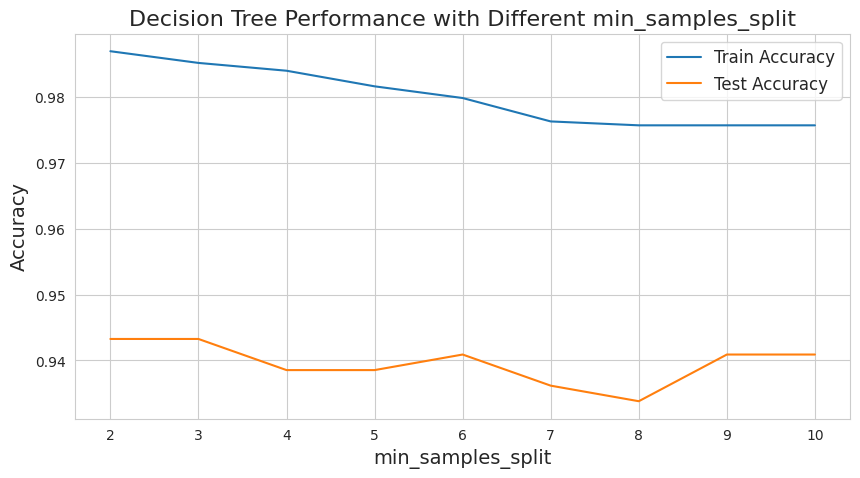

In [97]:
# Find optimal min_samples_split
# Define lists to store accuracies
accuracy_train_list = []
accuracy_test_list = []

# Range for min_samples_split
min_samples_split_range = range(2, 11)

# Iterate over min_samples_split values
for mss in min_samples_split_range:
    dtc = DecisionTreeClassifier(max_depth =8,
                                 min_impurity_decrease = 0,
                                 min_samples_split=mss,
                                 random_state=42)
    dtc.fit(X_train, y_train)

    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plotting
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(min_samples_split_range, accuracy_train_list, label="Train Accuracy")
plt.plot(min_samples_split_range, accuracy_test_list, label="Test Accuracy")
plt.legend(loc="upper right", prop={'size': 12})
plt.xticks(min_samples_split_range)
plt.xlabel("min_samples_split", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Decision Tree Performance with Different min_samples_split", size=16)
plt.show()

Optimal min_samples_split = 2

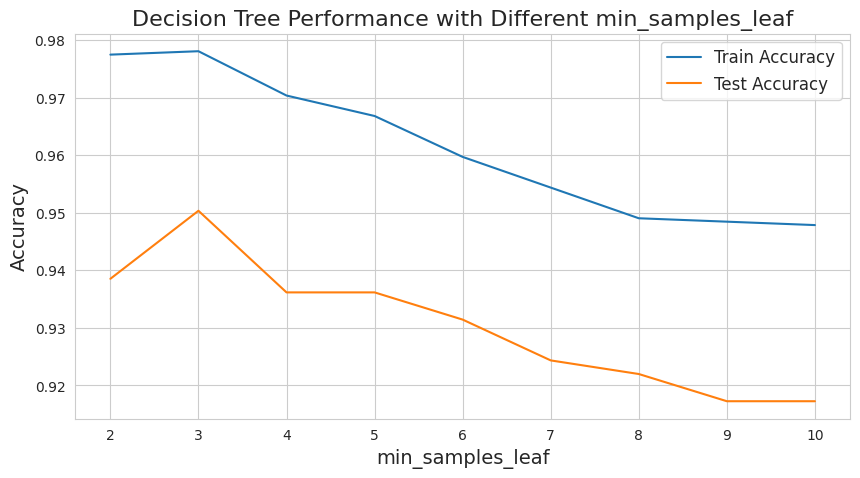

In [98]:
# Find optimal min_samples_leaf
# Define lists to store accuracies
accuracy_train_list = []
accuracy_test_list = []

# Range for min_samples_leaf_range
min_samples_leaf_range = range(2, 11)

# Iterate over min_samples_leaf values
for msl in min_samples_leaf_range:
    dtc = DecisionTreeClassifier(max_depth =8,
                                 min_impurity_decrease = 0,
                                 min_samples_split = 2,
                                 min_samples_leaf=msl,
                                 random_state=42)
    dtc.fit(X_train, y_train)

    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plotting
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(min_samples_leaf_range, accuracy_train_list, label="Train Accuracy")
plt.plot(min_samples_leaf_range, accuracy_test_list, label="Test Accuracy")
plt.legend(loc="upper right", prop={'size': 12})
plt.xticks(min_samples_leaf_range)
plt.xlabel("min_samples_leaf", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Decision Tree Performance with Different min_samples_leaf", size=16)
plt.show()

Optimal min_samples_leaf = 3

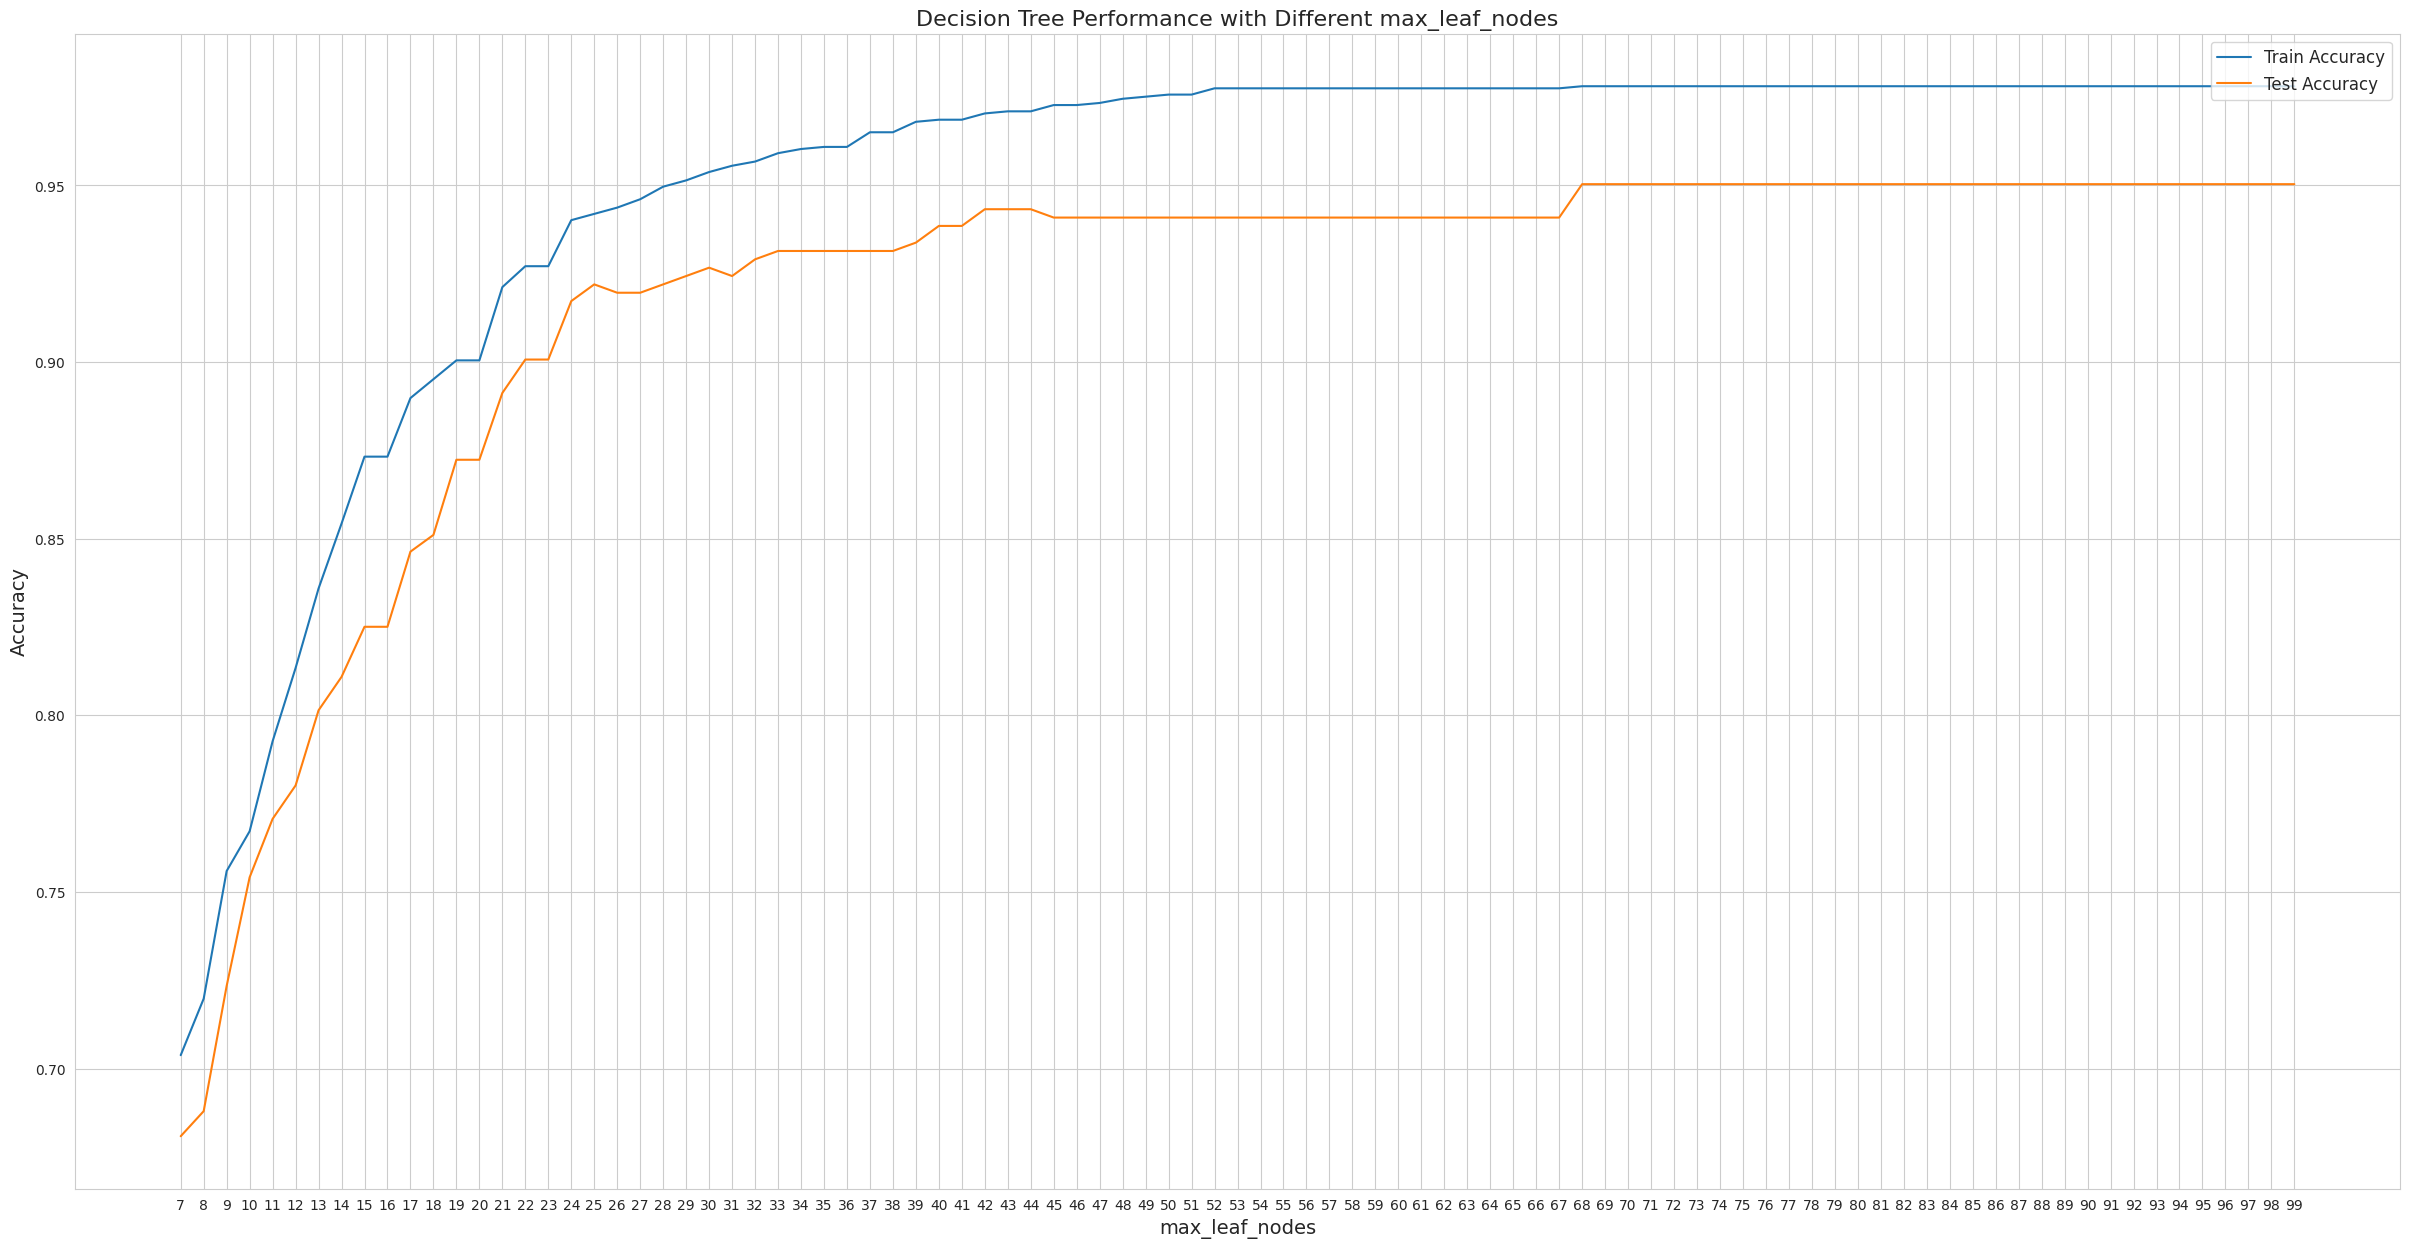

In [99]:
# Find optimal max_leaf_nodes
# Define lists to store accuracies
accuracy_train_list = []
accuracy_test_list = []

# Range for max_leaf_nodes_range
max_leaf_nodes_range = range(7, 100)

# Iterate over min_samples_leaf values
for mln in max_leaf_nodes_range:
    dtc = DecisionTreeClassifier(max_depth =8,
                                 min_impurity_decrease = 0,
                                 min_samples_split = 2,
                                 min_samples_leaf= 3,
                                 max_leaf_nodes = mln,
                                 random_state=42)
    dtc.fit(X_train, y_train)

    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plotting
plt.figure(figsize=(30,15))
sns.set_style("whitegrid")
plt.plot(max_leaf_nodes_range, accuracy_train_list, label="Train Accuracy")
plt.plot(max_leaf_nodes_range, accuracy_test_list, label="Test Accuracy")
plt.legend(loc="upper right", prop={'size': 12})
plt.xticks(max_leaf_nodes_range)
plt.xlabel("max_leaf_nodes", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Decision Tree Performance with Different max_leaf_nodes", size=16)
plt.show()

Optimal max_leaf_nodes = 68

In [100]:
# Test with all optimal hyperparameters
# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the decision tree classifier
clf = DecisionTreeClassifier(max_depth = 8,
                             min_impurity_decrease = 0,
                             min_samples_split = 2,
                             min_samples_leaf = 3,
                             max_leaf_nodes = 68,
                             random_state=42)

# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)

# Step 4: Evaluate the classifier on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# change the y_test and y_pred to number
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

# Calculate MAE and MSE
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy: 0.950354609929078

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.96        56
      Normal_Weight       0.93      0.90      0.92        62
     Obesity_Type_I       0.95      0.95      0.95        78
    Obesity_Type_II       0.96      0.95      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.93      0.93      0.93        56
Overweight_Level_II       0.92      0.96      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

Mean Absolute Error: 0.10638297872340426
Mean Squared Error: 0.3333333333333333


## Feature Engineering

In [101]:
# Create BMI Col with Weith and Height
obesity_df['BMI'] = obesity_df['Weight'] / (obesity_df['Height']**2)

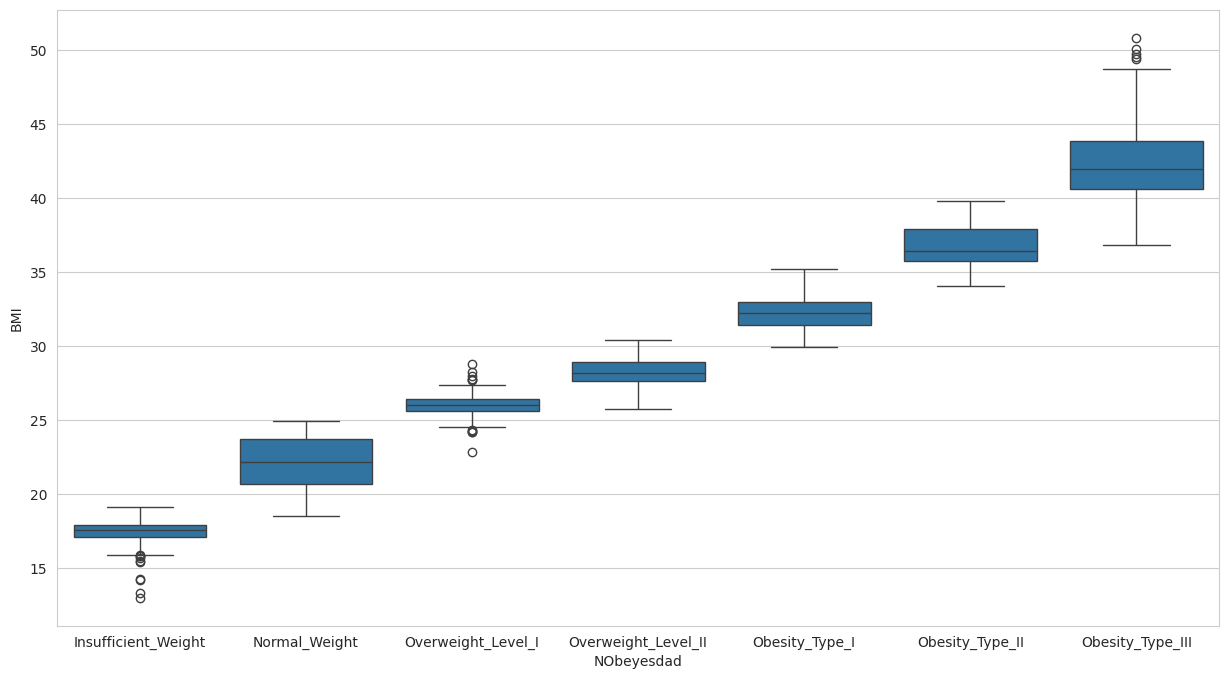

In [102]:
# BMI EDA
plt.figure(figsize=(15, 8))
sns.boxplot(x='NObeyesdad', y='BMI', data=obesity_df, order=category_order)
plt.show()

In [103]:
# Initialize the decision tree classifier
clf_test = DecisionTreeClassifier(random_state=42)

# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Height','Weight'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier on the training data
clf_test.fit(X_train, y_train)

# \Evaluate the classifier on the testing data
y_pred = clf_test.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# change the y_test and y_pred to number
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

# Calculate MAE and MSE
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy: 0.9645390070921985

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.96        56
      Normal_Weight       0.94      0.95      0.94        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.93      0.97      0.95        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       1.00      0.93      0.96        56
Overweight_Level_II       0.96      1.00      0.98        50

           accuracy                           0.96       423
          macro avg       0.96      0.97      0.96       423
       weighted avg       0.97      0.96      0.96       423

Mean Absolute Error: 0.04964539007092199
Mean Squared Error: 0.10638297872340426


In [104]:
# # SKIP THIS CODE (Takes 2 hours to run:)!!!!!!
# # A magic code that finds all the optimal hyperparameters at once

# # Define the parameter ranges
# min_impurity_decrease_range = [i / 100 for i in range(0, 11)]
# min_samples_split_range = range(2, 11)
# min_samples_leaf_range = range(2, 11)
# max_leaf_nodes_range = range(7, 50)  # Added range for max_leaf_nodes

# # Initialize the best score and best parameters variables
# best_accuracy = 0
# best_parameters = {}

# # Grid search over the parameter ranges
# for depth in range(1, 11):
#     for min_impurity_decrease in min_impurity_decrease_range:
#         for min_samples_split in min_samples_split_range:
#             for min_samples_leaf in min_samples_leaf_range:
#                 for max_leaf_nodes in max_leaf_nodes_range:
#                     dtc = DecisionTreeClassifier(max_depth=depth,
#                                                  min_impurity_decrease=min_impurity_decrease,
#                                                  min_samples_split=min_samples_split,
#                                                  min_samples_leaf=min_samples_leaf,
#                                                  max_leaf_nodes=max_leaf_nodes,
#                                                  random_state=42)
#                     dtc.fit(X_train, y_train)
#                     y_test_pred = dtc.predict(X_test)
#                     accuracy_test = accuracy_score(y_test, y_test_pred)

#                     # Update best score and parameters if current model is better
#                     if accuracy_test > best_accuracy:
#                         best_accuracy = accuracy_test
#                         best_parameters = {
#                             'max_depth': depth,
#                             'min_impurity_decrease': min_impurity_decrease,
#                             'min_samples_split': min_samples_split,
#                             'min_samples_leaf': min_samples_leaf,
#                             'max_leaf_nodes': max_leaf_nodes  # Save the best max_leaf_nodes
#                         }

# print(f"Best Accuracy: {best_accuracy}")
# print("Best Parameters:")
# print(best_parameters)

Best Accuracy: 0.9645390070921985

Best Parameters:{'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 9}

The box plot shows that BMI is an important predictor of the target variable.


In [105]:
# Feature engineering: Test the accuracy for DecisionTreeClassifier with all optimal hyperparameters
# Initialize the decision tree classifier
clf_test = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_split=2,
    max_leaf_nodes=9,
    min_samples_leaf=2,
    random_state=42
)

# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=[
    'Gender',
    'family_history_with_overweight',
    'FAVC', 'CAEC', 'SMOKE',
    'SCC', 'CALC', 'MTRANS'
    ])

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Height','Weight'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier on the training data
clf_test.fit(X_train, y_train)

# \Evaluate the classifier on the testing data
y_pred = clf_test.predict(X_test)
y_train_pred = clf_test.predict(X_train)

# Calculate accuracy
DTC_Best_train_Accuracy = accuracy_score(y_train, y_train_pred)
DTC_Best_test_Accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", DTC_Best_train_Accuracy)
print("Test Accuracy:", DTC_Best_test_Accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# change the y_test and y_pred to number
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

# Calculate MAE and MSE
DTC_mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
DTC_mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Mean Absolute Error:", DTC_mae)
print("Mean Squared Error:", DTC_mse)

Train Accuracy: 0.9792654028436019
Test Accuracy: 0.9645390070921985

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.95      0.97        56
      Normal_Weight       0.91      1.00      0.95        62
     Obesity_Type_I       0.95      0.96      0.96        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       1.00      0.91      0.95        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.96       423
          macro avg       0.97      0.96      0.96       423
       weighted avg       0.97      0.96      0.96       423

Mean Absolute Error: 0.07328605200945626
Mean Squared Error: 0.2198581560283688


## AdaBoostClassifier

In [106]:
# AdaBoost with max_depth=4 trees and 10 estimators
dtc_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=10,
    learning_rate=0.5, random_state=42)

dtc_ada.fit(X_train, y_train)

y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost. Accuracy - training set:', accuracy_train)
print('AdaBoost. Accuracy - testing set:', accuracy_test)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# change the y_test and y_pred to number
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_test_pred])

# Calculate MAE and MSE
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

AdaBoost. Accuracy - training set: 0.9976303317535545
AdaBoost. Accuracy - testing set: 0.9787234042553191

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.94      1.00      0.97        62
     Obesity_Type_I       1.00      0.96      0.98        78
    Obesity_Type_II       0.95      1.00      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.96      0.96        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

Mean Absolute Error: 0.03546099290780142
Mean Squared Error: 0.09219858156028368


In [107]:
# # SKIP THIS CODE (Takes 10 min to run:)!!!!!!
# from sklearn.model_selection import GridSearchCV
# # Ignore warnings
# warnings.filterwarnings("ignore")

# # Define the range for n_estimators
# n_estimators_range = range(5, 101)  # From 5 to 100 inclusive

# # Define the AdaBoost classifier
# dtc_ada = AdaBoostClassifier(learning_rate=0.5, random_state=42)

# # Define the parameter grid
# param_grid = {'n_estimators': list(n_estimators_range)}

# # Perform grid search
# grid_search = GridSearchCV(estimator=dtc_ada, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the corresponding accuracy
# best_params = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print("Best parameters:", best_params)
# print("Best accuracy:", best_accuracy)



Best parameters: 5 estimators

In [108]:
# AdaBoost with max_depth=4 trees and 5 estimators
dtc_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=5,
    learning_rate=0.5, random_state=42)

dtc_ada.fit(X_train, y_train)

y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

ADAC_Best_train_Accuracy = accuracy_score(y_train, y_train_pred)
ADAC_Best_test_Accuracy = accuracy_score(y_test, y_test_pred)

print('AdaBoost. Accuracy - training set:', ADAC_Best_train_Accuracy)
print('AdaBoost. Accuracy - testing set:', ADAC_Best_test_Accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# change the y_test and y_pred to number
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_test_pred])

# Calculate MAE and MSE
ADAC_mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
ADAC_mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Mean Absolute Error:", ADAC_mae)
print("Mean Squared Error:", ADAC_mse)

AdaBoost. Accuracy - training set: 0.9911137440758294
AdaBoost. Accuracy - testing set: 0.9787234042553191

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.94      1.00      0.97        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      0.93      0.96        56
Overweight_Level_II       0.96      1.00      0.98        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

Mean Absolute Error: 0.03546099290780142
Mean Squared Error: 0.09219858156028368


## XGBoostClassifier

In [109]:
# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Create a dictionary mapping target categories to numerical labels
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Map the target variable using the dictionary
obesity_df_encoded['NObeyesdad'] = obesity_df_encoded['NObeyesdad'].map(target_mapping)

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight','Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost Classifier
xgb_clf = XGBClassifier(
    learning_rate=0.5,
    n_estimators=100,
    random_state=42
)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

XGBC_Best_train_Accuracy = accuracy_score(y_train, y_train_pred)
XGBC_Best_test_Accuracy = accuracy_score(y_test, y_test_pred)
print('XGBoost Decison tree Accuracy - training set', round(XGBC_Best_train_Accuracy, 4))
print('XGBoost Decision tree Accuracy - testing set', round(XGBC_Best_test_Accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate MAE and MSE
XGBC_mae = mean_absolute_error(y_test, y_test_pred)
XGBC_mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error:", XGBC_mae)
print("Mean Squared Error:", XGBC_mse)

XGBoost Decison tree Accuracy - training set 1.0
XGBoost Decision tree Accuracy - testing set 0.9882

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.95      1.00      0.98        62
           2       1.00      0.96      0.98        56
           3       1.00      1.00      1.00        50
           4       1.00      0.97      0.99        78
           5       0.97      1.00      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Mean Absolute Error: 0.01182033096926714
Mean Squared Error: 0.01182033096926714


# Baseline Model 2_DecisionTreeRegressor

In [110]:
# DecisionTreeRegressor with Feature Engineered column: BMI
# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Create a dictionary mapping target categories to numerical labels
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Map the target variable using the dictionary
obesity_df_encoded['NObeyesdad'] = obesity_df_encoded['NObeyesdad'].map(target_mapping)

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight','Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train) # train tree on training set

y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test) # test on testing set

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Decison tree  Accuracy - training set', round(accuracy_train, 4))
print('Decision tree  Accuracy - testing set', round(accuracy_test, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Decison tree  Accuracy - training set 1.0
Decision tree  Accuracy - testing set 0.9693

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.92      0.98      0.95        62
           2       1.00      0.93      0.96        56
           3       0.96      1.00      0.98        50
           4       0.99      0.95      0.97        78
           5       0.95      0.98      0.97        58
           6       0.98      1.00      0.99        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Mean Absolute Error: 0.03309692671394799
Mean Squared Error: 0.037825059101654845


## Hyperparameter tuning for DecisionTreeRegressor

In [111]:
# # SKIP THIS CODE (Takes 30 min to run:)!!!!!!
# # A magic code that finds all the optimal hyperparameters at once

# # Define the parameter ranges
# min_impurity_decrease_range = [i / 100 for i in range(0, 11)]
# min_samples_split_range = range(2, 11)
# min_samples_leaf_range = range(2, 11)
# max_leaf_nodes_range = range(7, 50)

# # Initialize the best score and best parameters variables
# best_r2_score = -np.inf
# best_parameters = {}

# # Grid search over the parameter ranges
# for depth in range(1, 11):
#     for min_impurity_decrease in min_impurity_decrease_range:
#         for min_samples_split in min_samples_split_range:
#             for min_samples_leaf in min_samples_leaf_range:
#                 for max_leaf_nodes in max_leaf_nodes_range:
#                     DTR = DecisionTreeRegressor(max_depth=depth,
#                                                  min_impurity_decrease=min_impurity_decrease,
#                                                  min_samples_split=min_samples_split,
#                                                  min_samples_leaf=min_samples_leaf,
#                                                  max_leaf_nodes=max_leaf_nodes,
#                                                  random_state=42)
#                     DTR.fit(X_train, y_train)
#                     y_test_pred = DTR.predict(X_test)
#                     r2 = r2_score(y_test, y_test_pred)

#                     # Update best score and parameters if current model is better
#                     if r2 > best_r2_score:
#                         best_r2_score = r2
#                         best_parameters = {
#                             'max_depth': depth,
#                             'min_impurity_decrease': min_impurity_decrease,
#                             'min_samples_split': min_samples_split,
#                             'min_samples_leaf': min_samples_leaf,
#                             'max_leaf_nodes': max_leaf_nodes
#                         }

# print(f"Best R2 Score: {best_r2_score}")
# print("Best Parameters:")
# print(best_parameters)

Best R2 Score: 0.992602040737172

Best Parameters:
{'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 19}

In [112]:
# DecisionTreeRegressor with all optimal hyperparameters

# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Create a dictionary mapping target categories to numerical labels
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Map the target variable using the dictionary
obesity_df_encoded['NObeyesdad'] = obesity_df_encoded['NObeyesdad'].map(target_mapping)

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight','Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the DecisionTreeRegressor with the best hyperparameters
DTR = DecisionTreeRegressor(max_depth=5,
                            min_impurity_decrease=0,
                            min_samples_split=2,
                            min_samples_leaf=2,
                            max_leaf_nodes=19
                            )
DTR.fit(X_train, y_train)

# Make predictions
y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test)

# Discretize the predicted and actual values
y_train_pred_discrete = [int(round(pred)) for pred in y_train_pred]
y_test_pred_discrete = [int(round(pred)) for pred in y_test_pred]

y_train_discrete = [int(round(val)) for val in y_train]
y_test_discrete = [int(round(val)) for val in y_test]

# Calculate accuracy
DTR_Best_train_Accuracy = accuracy_score(y_train_discrete, y_train_pred_discrete)
DTR_Best_test_Accuracy = accuracy_score(y_test_discrete, y_test_pred_discrete)
print('Decision Tree Regressor Accuracy - training set:', DTR_Best_train_Accuracy)
print('Decision Tree Regressor Accuracy - testing set:', DTR_Best_test_Accuracy)
print("\nClassification Report:")
print(classification_report(y_test_discrete, y_test_pred_discrete))

# Calculate MAE and MSE
DTR_mae = mean_absolute_error(y_test_discrete, y_test_pred_discrete)
DTR_mse = mean_squared_error(y_test_discrete, y_test_pred_discrete)

print("Mean Absolute Error:", DTR_mae)
print("Mean Squared Error:", DTR_mse)


Decision Tree Regressor Accuracy - training set: 0.9851895734597157
Decision Tree Regressor Accuracy - testing set: 0.966903073286052

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.93      1.00      0.96        62
           2       1.00      0.89      0.94        56
           3       0.93      1.00      0.96        50
           4       0.97      0.96      0.97        78
           5       0.95      0.97      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Mean Absolute Error: 0.03309692671394799
Mean Squared Error: 0.03309692671394799


## AdaBoostRegressor

In [113]:
# Encode categorical variables
obesity_df_encoded = pd.get_dummies(obesity_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Create a dictionary mapping target categories to numerical labels
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Map the target variable using the dictionary
obesity_df_encoded['NObeyesdad'] = obesity_df_encoded['NObeyesdad'].map(target_mapping)

# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight','Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost with max_depth=9 DecisionTreeClassifier and 5 estimators
dtr_ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=2, max_leaf_nodes=19),
    learning_rate=0.1,
    random_state=42
    )

dtr_ada.fit(X_train, y_train)

y_train_pred = dtr_ada.predict(X_train)
y_test_pred = dtr_ada.predict(X_test)

# Discretize the predicted and actual values
y_train_pred_discrete = [int(round(pred)) for pred in y_train_pred]
y_test_pred_discrete = [int(round(pred)) for pred in y_test_pred]

y_train_discrete = [int(round(val)) for val in y_train]
y_test_discrete = [int(round(val)) for val in y_test]

# Calculate accuracy
ADAR_Best_train_Accuracy = accuracy_score(y_train_discrete, y_train_pred_discrete)
ADAR_Best_test_Accuracy = accuracy_score(y_test_discrete, y_test_pred_discrete)

print('AdaBoost. Accuracy - training set:', ADAR_Best_train_Accuracy)
print('AdaBoost. Accuracy - testing set:', ADAR_Best_test_Accuracy)
print("\nClassification Report:")
print(classification_report(y_test_discrete, y_test_pred_discrete))

# Calculate MAE and MSE
ADAR_mae = mean_absolute_error(y_test_discrete, y_test_pred_discrete)
ADAR_mse = mean_squared_error(y_test_discrete, y_test_pred_discrete)

print("Mean Absolute Error:", ADAR_mae)
print("Mean Squared Error:", ADAR_mse)


AdaBoost. Accuracy - training set: 1.0
AdaBoost. Accuracy - testing set: 0.983451536643026

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.93      1.00      0.96        62
           2       0.98      0.96      0.97        56
           3       1.00      0.98      0.99        50
           4       1.00      0.99      0.99        78
           5       0.98      1.00      0.99        58
           6       1.00      1.00      1.00        63

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Mean Absolute Error: 0.016548463356973995
Mean Squared Error: 0.016548463356973995


## XGBoostRegressor

In [114]:
# Create and train the XGBoost Regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

# Calculate Accuracies
# For the training set
train_results_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred_xgb
})

# For the testing set
test_results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_xgb
})

# Round the prediction results to make it comparable with the assigned obesity levels "0 - 6"
train_results_df['Predicted_Rounded'] = train_results_df['Predicted'].round()
test_results_df['Predicted_Rounded'] = test_results_df['Predicted'].round()

# Find accuracy for train data
XGBR_Best_train_Accuracy = accuracy_score(train_results_df['Actual'], train_results_df['Predicted_Rounded'])

print("train Accuracy:", XGBR_Best_train_Accuracy)

# Find accuracy for test data
XGBR_Best_test_Accuracy = accuracy_score(test_results_df['Actual'], test_results_df['Predicted_Rounded'])

print("test Accuracy:", XGBR_Best_test_Accuracy)
print("\nClassification Report:")
print(classification_report(test_results_df['Actual'], test_results_df['Predicted_Rounded']))

# Calculate MAE and MSE
XGBR_mae = mean_absolute_error(test_results_df['Actual'], test_results_df['Predicted_Rounded'])
XGBR_mse = mean_squared_error(test_results_df['Actual'], test_results_df['Predicted_Rounded'])

print("Mean Absolute Error:", XGBR_mae)
print("Mean Squared Error:", XGBR_mse)

train Accuracy: 1.0
test Accuracy: 0.9787234042553191

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.95      0.98      0.97        62
           2       0.98      0.91      0.94        56
           3       0.94      1.00      0.97        50
           4       1.00      0.97      0.99        78
           5       0.97      1.00      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Mean Absolute Error: 0.02127659574468085
Mean Squared Error: 0.02127659574468085


# Baseline Model 3_Random Forest

In [115]:
rf = RandomForestClassifier()
# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight', 'Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('RandomForest. Accuracy - training set', accuracy_train)
print('RandomForest. Accuracy - testing set', accuracy_test)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

RandomForest. Accuracy - training set 1.0
RandomForest. Accuracy - testing set 0.9645390070921985

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.91      0.95      0.93        62
           2       0.91      0.91      0.91        56
           3       1.00      0.94      0.97        50
           4       0.99      0.97      0.98        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423

Mean Absolute Error: 0.03546099290780142
Mean Squared Error: 0.03546099290780142


## Hyperparameters tuning for the Random Forest

In [116]:
# # SKIP THIS CODE (Takes 5 hours to run:)!!!!!!
# # Define the model
# rf = RandomForestClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': range(20, 500, 20),
#     'max_depth': range(1, 20),
#     'min_samples_split': range(2, 11),
#     'min_samples_leaf': range(1, 11),
#     'max_features': range(1, 3),
#     'bootstrap': [True, False]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Best parameters set
# print("Best parameters found: ", grid_search.best_params_)

# # Best score
# print("Best accuracy found: ", grid_search.best_score_)

# # Evaluate on test set
# y_test_pred = grid_search.predict(X_test)
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("Accuracy on the test set: ",accuracy_test)

Best parameters found:  {'bootstrap': False, 'max_depth': 16, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 180}
Best accuracy found:  0.9395712253963795
Accuracy on the test set:  0.9456264775413712

In [117]:
# Apply all optimal hyperparameters for RandomForestClassifier

#rf = RandomForestClassifier(max_depth=11,n_estimators=9,random_state=42)
rf = RandomForestClassifier(max_depth=16,n_estimators=180,min_samples_split=2,bootstrap=False,random_state=42)
# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight', 'Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

RF_train_Accuracy = accuracy_score(y_train, y_train_pred)
RF_test_Accuracy = accuracy_score(y_test, y_test_pred)

print('RandomForest. Accuracy - training set', RF_train_Accuracy)
print('RandomForest. Accuracy - testing set', RF_test_Accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

RandomForest. Accuracy - training set 1.0
RandomForest. Accuracy - testing set 0.9716312056737588

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.94      0.95      0.94        62
           2       0.93      0.93      0.93        56
           3       0.98      0.96      0.97        50
           4       0.99      0.99      0.99        78
           5       0.98      0.98      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Mean Absolute Error: 0.028368794326241134
Mean Squared Error: 0.028368794326241134


The training set accuracy is 1 indicating that there might be overfitting in this model.
We tried to find an optimal balance between the hyperparameters: max_depth and n_estimators


In [118]:
# Apply all optimal hyperparameters for RandomForestClassifier

#rf = RandomForestClassifier(max_depth=11,n_estimators=9,random_state=42)
rf = RandomForestClassifier(max_depth=13,n_estimators=85,min_samples_split=2,bootstrap=False,random_state=42)
# Split features and target variable
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight', 'Height'])
y = obesity_df_encoded['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

RF_Best_train_Accuracy = accuracy_score(y_train, y_train_pred)
RF_Best_test_Accuracy = accuracy_score(y_test, y_test_pred)

print('RandomForest. Accuracy - training set', RF_Best_train_Accuracy)
print('RandomForest. Accuracy - testing set', RF_Best_test_Accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate MAE and MSE
RF_mae = mean_absolute_error(y_test, y_test_pred)
RF_mse = mean_squared_error(y_test, y_test_pred)

print("Mean Absolute Error:", RF_mae)
print("Mean Squared Error:", RF_mse)

RandomForest. Accuracy - training set 1.0
RandomForest. Accuracy - testing set 0.9810874704491725

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.95      0.98      0.97        62
           2       0.96      0.95      0.95        56
           3       0.98      0.98      0.98        50
           4       0.99      0.99      0.99        78
           5       0.98      0.98      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Mean Absolute Error: 0.018912529550827423
Mean Squared Error: 0.018912529550827423


# Baseline Model 4_Neural Networks

In [119]:
# Define X and y
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight', 'Height'])
y = obesity_df_encoded['NObeyesdad']

# Preprocessing for numerical and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy: 0.9125295508274232

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        56
           1       0.94      0.82      0.88        62
           2       0.79      0.82      0.81        56
           3       0.83      0.80      0.82        50
           4       0.95      0.94      0.94        78
           5       0.93      0.98      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423

Mean Absolute Error: 0.08747044917257683
Mean Squared Error: 0.08747044917257683


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Hyperparameter Tuning for Nerual Networks

In [120]:
# # The search for hyperparameters for the neural network:

# # Ignore all warnings
# warnings.filterwarnings("ignore")

# model = MLPClassifier(max_iter=1000, random_state=42)

# # Define the parameter grid
# parameter_space = {
#     'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant', 'adaptive']
# }

# # Perform grid search
# grid = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
# grid.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters found:")
# print(grid.best_params_)
# print("\nBest score found:")
# print(grid.best_score_)


Best parameters found:
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Best score found:
0.9561702369740144

In [121]:
# Define X and y
X = obesity_df_encoded.drop(columns=['NObeyesdad','Weight', 'Height'])
y = obesity_df_encoded['NObeyesdad']

# Preprocessing for numerical and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MLPClassifier(hidden_layer_sizes=(50,100,50),
                                                     activation='relu',
                                                     solver='adam',
                                                     alpha=0.05,
                                                     learning_rate= 'constant',
                                                     random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calculate training accuracy
NN_Best_test_Accuracy = accuracy_score(y_test, y_pred)
NN_Best_train_Accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model
print("Train Accuracy:", NN_Best_train_Accuracy)
print("Test Accuracy:", NN_Best_test_Accuracy)
print("\nClassification Report:\n", classification_report(y_test,y_pred))

# Calculate MAE and MSE
NN_mae = mean_absolute_error(y_test, y_pred)
NN_mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", NN_mae)
print("Mean Squared Error:", NN_mse)

Train Accuracy: 0.9822274881516587
Test Accuracy: 0.9621749408983451

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       0.97      0.94      0.95        62
           2       0.98      0.88      0.92        56
           3       0.91      1.00      0.95        50
           4       0.99      0.95      0.97        78
           5       0.93      0.98      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Mean Absolute Error: 0.037825059101654845
Mean Squared Error: 0.037825059101654845


# Summary

In [122]:
# ... continue for all the other model accuracy scores

# Creating a dictionary for constructing the DataFrame
accuracy_dict = {
    'Model': [
        'DecisionTreeClassifier', 'AdaBoostClassifier', 'XGBoostClassifier',
        'DecisionTreeRegressor', 'AdaBoostRegressor', 'XGBoostRegressor',
        'Random Forest', 'Neural Networks'
    ],
    'Train_Accuracy': [
        DTC_Best_train_Accuracy, ADAC_Best_train_Accuracy,
        XGBC_Best_train_Accuracy, DTR_Best_train_Accuracy,
        ADAR_Best_train_Accuracy, XGBR_Best_train_Accuracy,
        RF_Best_train_Accuracy, NN_Best_train_Accuracy

    ],
    'Best_Test_Accuracy': [
        DTC_Best_test_Accuracy, ADAC_Best_test_Accuracy,
        XGBC_Best_test_Accuracy, DTR_Best_test_Accuracy,
        ADAR_Best_test_Accuracy, XGBR_Best_test_Accuracy,
        RF_Best_test_Accuracy, NN_Best_test_Accuracy
    ],
    'MSE': [
        DTC_mse, ADAC_mse,
        XGBC_mse, DTR_mse,
        ADAR_mse, XGBR_mse,
        RF_mse, NN_mse
    ],
    'MAE': [
        DTC_mae, ADAC_mae,
        XGBC_mae, DTR_mae,
        ADAR_mae, XGBR_mae,
        RF_mae, NN_mae
    ]
}
# Constructing the DataFrame
accuracy_df = pd.DataFrame(accuracy_dict)

# Sorting the DataFrame by 'Best_Test_Accuracy' in descending order before plotting
accuracy_df_sorted = accuracy_df.sort_values('Best_Test_Accuracy', ascending=False)

# Setting 'Model' as the index for plotting purposes
accuracy_df_sorted.set_index('Model', inplace=True)

accuracy_df_sorted

,Train_Accuracy,Best_Test_Accuracy,MSE,MAE
Model,,,,
XGBoostClassifier,1.000000,0.988180,0.011820,0.011820
AdaBoostRegressor,1.000000,0.983452,0.016548,0.016548
Random Forest,1.000000,0.981087,0.018913,0.018913
AdaBoostClassifier,0.991114,0.978723,0.092199,0.035461
XGBoostRegressor,1.000000,0.978723,0.021277,0.021277
DecisionTreeRegressor,0.985190,0.966903,0.033097,0.033097
DecisionTreeClassifier,0.979265,0.964539,0.219858,0.073286
Neural Networks,0.982227,0.962175,0.037825,0.037825


MSE and MAE can indicate how "far off" your predictions are, on average or “the average severity of misclassification”.
(e.g., falsely predicting "Obesity_Type_III" when true class is "Normal_Weight" is worse than confusing "Obesity_Type_I" and "Obesity_Type_II")


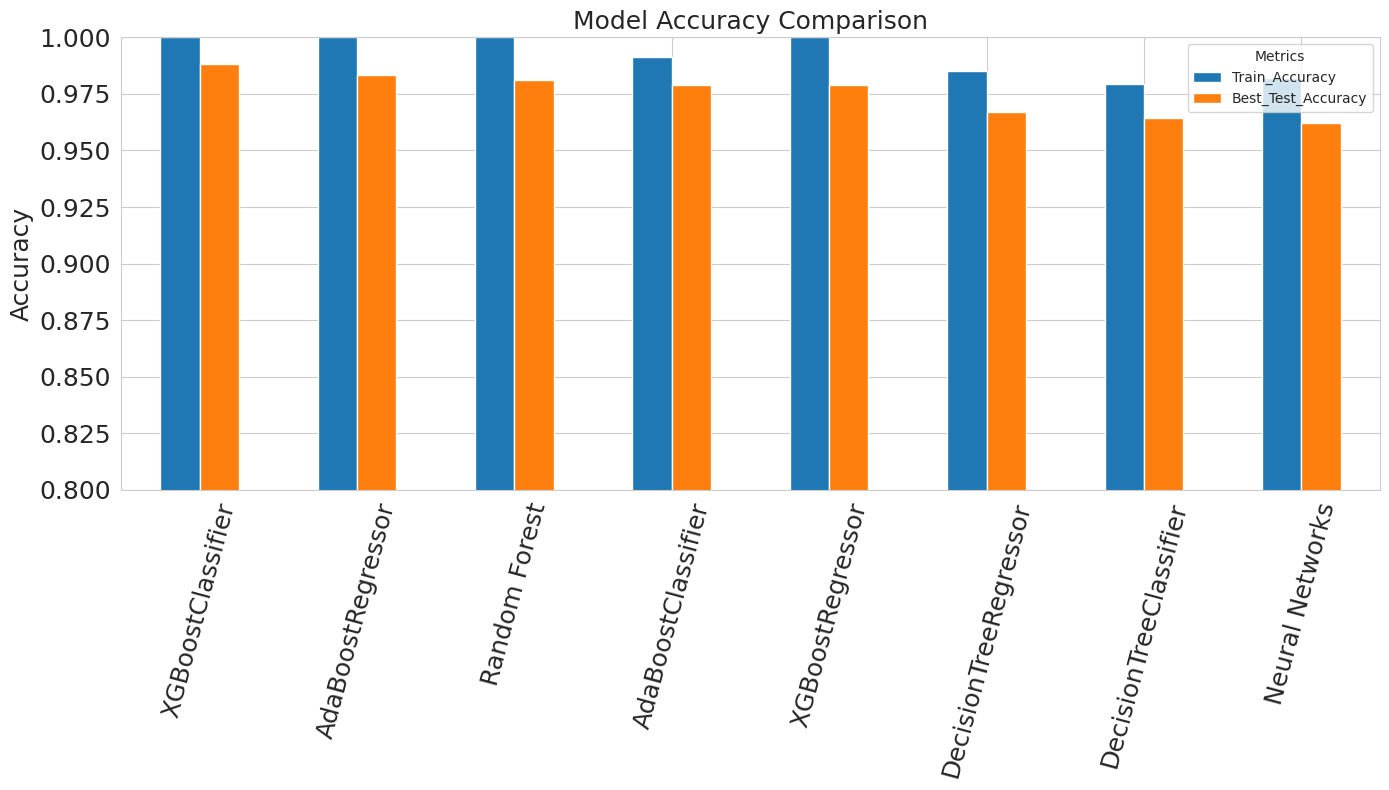

In [123]:
plotdata1 = accuracy_df_sorted[['Train_Accuracy', 'Best_Test_Accuracy']]
# Plotting the sorted DataFrame
plotdata1.plot(kind='bar', figsize=(14, 8), ylim=(0.8, 1.0), fontsize = 18)
plt.title('Model Accuracy Comparison', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('')
plt.xticks(rotation=75)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


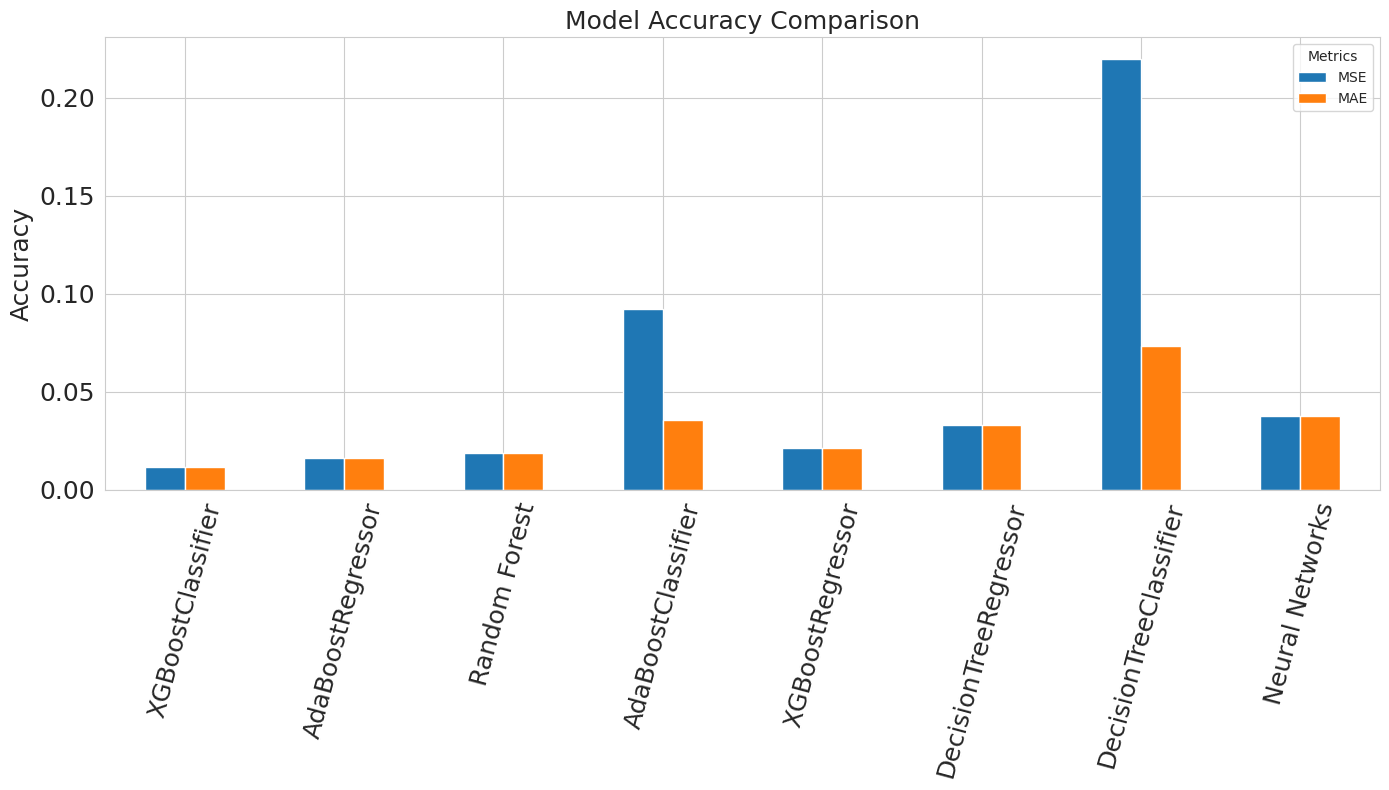

In [124]:
# Extract only the relevant columns ('Model', 'Train_Accuracy', 'Best_Test_Accuracy') for plotting
plot_data2 = accuracy_df_sorted[['MSE', 'MAE']]

# Plotting the sorted DataFrame
plot_data2.plot(kind='bar', figsize=(14, 8), fontsize = 18)
plt.title('Model Accuracy Comparison', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('')
plt.xticks(rotation=75)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()
